<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2 - Ames Housing Data (Part 3 - Kaggle Submission)

## Imports

In [1]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='darkgrid')

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, ElasticNet, ElasticNetCV, Ridge, Lasso, RidgeCV, LassoCV
from sklearn.metrics import mean_squared_error, r2_score

# Display all rows and columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
test_df = pd.read_csv('../datasets/test.csv')

In [3]:
test_df.shape

(878, 80)

In [4]:
test_df.columns = test_df.columns.str.lower().str.replace(' ','_')

In [5]:
test_df.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,NaN,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,NaN,NaN,NaN,0,7,2009,WD


## Summary Statistics

In [6]:
test_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,878.0,1.444749e+03,8.508383e+02,2.0,6.922500e+02,1433.0,2.197500e+03,2.928000e+03
pid,878.0,7.162867e+08,1.889103e+08,526302110.0,5.284841e+08,535454155.0,9.071904e+08,1.007100e+09
ms_subclass,878.0,5.826879e+01,4.223541e+01,20.0,2.000000e+01,50.0,7.000000e+01,1.900000e+02
lot_frontage,718.0,6.954596e+01,2.353394e+01,21.0,5.900000e+01,68.0,8.000000e+01,1.820000e+02
lot_area,878.0,1.030703e+04,1.000267e+04,1477.0,7.297250e+03,9446.0,1.158900e+04,2.152450e+05
overall_qual,878.0,6.050114e+00,1.369065e+00,2.0,5.000000e+00,6.0,7.000000e+00,1.000000e+01
overall_cond,878.0,5.566059e+00,1.128903e+00,1.0,5.000000e+00,5.0,6.000000e+00,9.000000e+00
year_built,878.0,1.970492e+03,3.039589e+01,1880.0,1.954000e+03,1972.0,1.999750e+03,2.010000e+03
year_remod/add,878.0,1.984418e+03,2.045072e+01,1950.0,1.967000e+03,1992.0,2.003000e+03,2.010000e+03
mas_vnr_area,877.0,1.062360e+02,1.871589e+02,0.0,0.000000e+00,0.0,1.720000e+02,1.378000e+03


In [7]:
test_df['ms_subclass'] = test_df['ms_subclass'].apply(str)

'ms_subclass' represents the building class, which should be a categorical column even though the data is numerical in nature. We will convert it to the string format.

## Data Cleaning
### Dealing with missing/NaN values

In [8]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               878 non-null    int64  
 1   pid              878 non-null    int64  
 2   ms_subclass      878 non-null    object 
 3   ms_zoning        878 non-null    object 
 4   lot_frontage     718 non-null    float64
 5   lot_area         878 non-null    int64  
 6   street           878 non-null    object 
 7   alley            58 non-null     object 
 8   lot_shape        878 non-null    object 
 9   land_contour     878 non-null    object 
 10  utilities        878 non-null    object 
 11  lot_config       878 non-null    object 
 12  land_slope       878 non-null    object 
 13  neighborhood     878 non-null    object 
 14  condition_1      878 non-null    object 
 15  condition_2      878 non-null    object 
 16  bldg_type        878 non-null    object 
 17  house_style     

In [9]:
test_df.isnull().sum()[test_df.isnull().sum()>0].sort_values(ascending=False)

pool_qc           874
misc_feature      837
alley             820
fence             706
fireplace_qu      422
lot_frontage      160
garage_yr_blt      45
garage_finish      45
garage_qual        45
garage_cond        45
garage_type        44
bsmt_exposure      25
bsmtfin_type_1     25
bsmtfin_type_2     25
bsmt_cond          25
bsmt_qual          25
mas_vnr_area        1
mas_vnr_type        1
electrical          1
dtype: int64

Referring to the data dictionary, we notice that most of the NaN values are due to the absence of features, hence for such scenarioes we will assign 'NA' if it is a categorical column, and 0 if it is a numerical column

We will then drop columns as with our train data set, and fill in NaN values with either 'NA' or an appropriate value

In [10]:
# drop PID column as they are identifier numbers and are unique for each row 
test_df.drop('pid', axis=1, inplace= True)

In [11]:
# drop cols with high proportion of null values -> low variance even if assigned 'NA'
low_var_col = ['pool_qc', 'misc_feature', 'alley', 'fence']
test_df = test_df.drop(low_var_col, axis=1)

In [12]:
# replace null values with 'NA' to reflect absence of features (masonry veneer)
test_df['mas_vnr_type'] = test_df['mas_vnr_type'].fillna('NA')

# replace null values with 0 to reflect absence of features (masonry veneer)
test_df['mas_vnr_area'] = test_df['mas_vnr_area'].fillna(0)

# replace null values with 'NA' to reflect absence of features (garage)
garage_null = ['garage_type', 'garage_finish', 'garage_qual', 'garage_cond']
test_df[garage_null] = test_df[garage_null].fillna('NA')

# replace null values with 'NA' to reflect absence of features (fireplace)
test_df['fireplace_qu'] = test_df['fireplace_qu'].fillna('NA')

# replace null values for 'Garage Yr Blt' with values from 'Year Built'
test_df['garage_yr_blt'] = test_df['garage_yr_blt'].fillna(test_df['year_built'])

# replace null values with 'NA' to reflect absence of features (basement)
bsmt_null = ['bsmt_qual','bsmt_cond','bsmt_exposure','bsmtfin_type_1','bsmtfin_type_2']
test_df[bsmt_null] = test_df[bsmt_null].fillna('NA')

#replace NaN values under lot_frontage column with mean values of lot_frontage (groupby via lot_configuration)
test_df['lot_frontage'] = test_df.groupby('lot_config')['lot_frontage'].transform(lambda value: value.fillna(value.mean()))

We only have 1 NaN left, and it lies in the 'electrical' column. We did not face this issue in our train dataset cleaning. Therefore we have to figure it out here.

In [13]:
test_df.groupby('electrical')['year_built'].mean()

electrical
FuseA    1937.229167
FuseF    1928.533333
FuseP    1910.000000
SBrkr    1973.260763
Name: year_built, dtype: float64

In [14]:
test_df[test_df['electrical'].isnull()]['year_built']

634    2006
Name: year_built, dtype: int64

Using a groupby function, we can see that the standard circuit breakers and Romex (Sbrkr) were found in houses that were built in later years(mean of 1973) with a notable difference in years from the other electrical systems. This house with the NaN value was built in 2006, we can reasonable assume the electrical system used is the standard circuit breakers and Romex.

In [15]:
test_df.loc[634,'electrical'] = 'Sbrkr'

In [16]:
test_df.isnull().sum()[test_df.isnull().sum()>0].sort_values(ascending=False)

Series([], dtype: int64)

Now that our dataset is free of missing values, we can proceed with EDA and feature engineering.

### Converting ordinal data to numerical data

In [17]:
test_df['lot_shape'] = test_df['lot_shape'].map({'Reg':0, 'IR1':1, 'IR2':2, 'IR3':3})
test_df['utilities'] = test_df['utilities'].map({'ELO':0, 'NoSeWa':1, 'NoSewr':2, 'AllPub':3})
test_df['land_slope'] = test_df['land_slope'].map({'Gtl':0, 'Mod':1, 'Sev':2})
test_df['exter_qual'] = test_df['exter_qual'].map({'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
test_df['exter_cond'] = test_df['exter_cond'].map({'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
test_df['bsmt_qual'] = test_df['bsmt_qual'].map({'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
test_df['bsmt_cond'] = test_df['bsmt_cond'].map({'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
test_df['bsmt_exposure'] = test_df['bsmt_exposure'].map({'NA':0, 'No':1, 'Mn':2, 'Av':3, 'Gd':4})
test_df['bsmtfin_type_1'] = test_df['bsmtfin_type_1'].map({'NA':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6})
test_df['bsmtfin_type_2'] = test_df['bsmtfin_type_2'].map({'NA':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6})
test_df['heating_qc'] = test_df['heating_qc'].map({'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
test_df['central_air'] = test_df['central_air'].map({'N':0, 'Y':1})
test_df['kitchen_qual'] = test_df['kitchen_qual'].map({'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
test_df['functional'] = test_df['functional'].map({'Sal':0, 'Sev':1, 'Maj2':2, 'Maj1':3, 'Mod':4, 'Min2':5, 'Min1':6, 'Typ':7})
test_df['fireplace_qu'] = test_df['fireplace_qu'].map({'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
test_df['garage_finish'] = test_df['garage_finish'].map({'NA':0, 'Unf':1, 'RFn':2, 'Fin':3})
test_df['garage_qual'] = test_df['garage_qual'].map({'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
test_df['garage_cond'] = test_df['garage_cond'].map({'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
test_df['paved_drive'] = test_df['paved_drive'].map({'N':0, 'P':1, 'Y':2})

In [18]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 75 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               878 non-null    int64  
 1   ms_subclass      878 non-null    object 
 2   ms_zoning        878 non-null    object 
 3   lot_frontage     878 non-null    float64
 4   lot_area         878 non-null    int64  
 5   street           878 non-null    object 
 6   lot_shape        878 non-null    int64  
 7   land_contour     878 non-null    object 
 8   utilities        878 non-null    int64  
 9   lot_config       878 non-null    object 
 10  land_slope       878 non-null    int64  
 11  neighborhood     878 non-null    object 
 12  condition_1      878 non-null    object 
 13  condition_2      878 non-null    object 
 14  bldg_type        878 non-null    object 
 15  house_style      878 non-null    object 
 16  overall_qual     878 non-null    int64  
 17  overall_cond    

In [19]:
test_df.head()

,id,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type
0,2658,190,RM,69.000000,9142,Pave,0,Lvl,3,Inside,0,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,2,1,Stone,2,3,1,1,0,1,0,1020,1020,GasA,3,0,FuseP,908,1020,0,1928,0,0,2,0,4,2,1,9,7,0,0,Detchd,1910.0,1,1,440,1,1,2,0,60,112,0,0,0,0,4,2006,WD
1,2718,90,RL,67.496377,9662,Pave,1,Lvl,3,Inside,0,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,2,2,CBlock,4,3,1,1,0,1,0,1967,1967,GasA,2,1,SBrkr,1967,0,0,1967,0,0,2,0,6,2,2,10,7,0,0,Attchd,1977.0,3,2,580,3,3,2,170,0,0,0,0,0,0,8,2006,WD
2,2414,60,RL,58.000000,17104,Pave,1,Lvl,3,Inside,0,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,2,PConc,4,4,3,6,554,1,0,100,654,GasA,4,1,SBrkr,664,832,0,1496,1,0,2,1,3,1,3,7,7,1,4,Attchd,2006.0,2,2,426,3,3,2,100,24,0,0,0,0,0,9,2006,New
3,1989,30,RM,60.000000,8520,Pave,0,Lvl,3,Inside,0,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,3,2,CBlock,3,3,1,1,0,1,0,968,968,GasA,2,1,SBrkr,968,0,0,968,0,0,1,0,2,1,2,5,7,0,0,Detchd,1935.0,1,2,480,2,3,0,0,0,184,0,0,0,0,7,2007,WD
4,625,20,RL,67.496377,9500,Pave,1,Lvl,3,Inside,0,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,2,2,CBlock,4,3,1,4,609,1,0,785,1394,GasA,3,1,SBrkr,1394,0,0,1394,1,0,1,1,3,1,2,6,7,2,4,Attchd,1963.0,2,2,514,3,3,2,0,76,0,0,185,0,0,7,2009,WD


## Feature Engineering
### Removing featuring columns with duplicate information

In [20]:
# Adding/removing the necessary feature columns as with train dataset

#create new feature columns
test_df['total_bath'] = test_df['bsmt_full_bath'] + test_df['bsmt_half_bath'] + test_df['full_bath'] + test_df['half_bath']

#remove feature columns
to_drop=['bsmtfin_sf_1','bsmtfin_sf_2','bsmt_unf_sf',
        'bsmt_full_bath','bsmt_half_bath','full_bath','half_bath',
        '1st_flr_sf','2nd_flr_sf','low_qual_fin_sf']
test_df = test_df.drop(to_drop,axis=1)

In [21]:
# columns that were dropped in train dataset due to low variance

low_var_col = ['street', 
               'utilities', 
               'land_slope', 
               'condition_2', 
               'roof_matl', 
               'heating', 
               'central_air', 
               'electrical', 
               'kitchen_abvgr', 
               'functional', 
               'garage_cond', 
               'paved_drive', 
               '3ssn_porch', 
               'screen_porch', 
               'pool_area', 
               'misc_val']

In [22]:
# columns that were dropped in train dataset due to low correlation with saleprice

low_corr_col = ['lot_frontage', 
                'lot_area', 
                'lot_shape', 
                'overall_cond', 
                'year_built', 
                'year_remod/add', 
                'mas_vnr_area', 
                'exter_cond', 
                'bsmt_cond', 
                'bsmt_exposure', 
                'bsmtfin_type_1', 
                'bsmtfin_type_2', 
                'heating_qc', 
                'bedroom_abvgr', 
                'totrms_abvgrd', 
                'fireplaces', 
                'fireplace_qu', 
                'garage_yr_blt', 
                'garage_finish', 
                'garage_qual', 
                'wood_deck_sf', 
                'open_porch_sf', 
                'enclosed_porch', 
                'mo_sold', 
                'yr_sold']

In [23]:
#drop low variance and low correlation columns

test_df.drop(columns=low_var_col, axis=1, inplace=True)
test_df.drop(columns=low_corr_col, axis=1, inplace=True)

In [24]:
# drop col as in train dataset
test_df.drop('garage_area', axis=1, inplace=True)

In [25]:
test_df.shape

(878, 24)

## One-hot encoding

In [26]:
test_id = test_df['id']
test_df.drop('id', axis=1, inplace=True)

In [27]:
test_df['traintest'] = 1

In [28]:
train_df = pd.read_csv('../datasets/train_cleaned.csv')
train_X_df = train_df.drop('saleprice',axis=1)
train_X_df['traintest'] = 0

In [29]:
X_combined = pd.concat(objs=[test_df,train_X_df],axis=0)

In [30]:
X_combined = pd.get_dummies(data=X_combined,drop_first=True)

In [31]:
#Remove train dataset and traintest column
train = X_combined[X_combined['traintest']==0]
train = train.drop('traintest', axis=1)

test = X_combined[X_combined['traintest']==1]
test = test.drop('traintest', axis=1)

In [32]:
test.shape

(878, 158)

In [33]:
test.head()

,overall_qual,exter_qual,bsmt_qual,total_bsmt_sf,gr_liv_area,kitchen_qual,garage_cars,total_bath,ms_subclass_30,ms_subclass_40,ms_subclass_45,ms_subclass_50,ms_subclass_60,ms_subclass_70,ms_subclass_75,ms_subclass_80,ms_subclass_85,ms_subclass_90,ms_subclass_120,ms_subclass_150,ms_subclass_160,ms_subclass_180,ms_subclass_190,ms_subclass_120,ms_subclass_160,ms_subclass_180,ms_subclass_190,ms_subclass_20,ms_subclass_30,ms_subclass_40,ms_subclass_45,ms_subclass_50,ms_subclass_60,ms_subclass_70,ms_subclass_75,ms_subclass_80,ms_subclass_85,ms_subclass_90,ms_zoning_C (all),ms_zoning_FV,ms_zoning_I (all),ms_zoning_RH,ms_zoning_RL,ms_zoning_RM,land_contour_HLS,land_contour_Low,land_contour_Lvl,lot_config_CulDSac,lot_config_FR2,lot_config_FR3,lot_config_Inside,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_Greens,neighborhood_GrnHill,neighborhood_IDOTRR,neighborhood_Landmrk,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,condition_1_Feedr,condition_1_Norm,condition_1_PosA,condition_1_PosN,condition_1_RRAe,condition_1_RRAn,condition_1_RRNe,condition_1_RRNn,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,house_style_1.5Unf,house_style_1Story,house_style_2.5Fin,house_style_2.5Unf,house_style_2Story,house_style_SFoyer,house_style_SLvl,roof_style_Gable,roof_style_Gambrel,roof_style_Hip,roof_style_Mansard,roof_style_Shed,exterior_1st_AsphShn,exterior_1st_BrkComm,exterior_1st_BrkFace,exterior_1st_CBlock,exterior_1st_CemntBd,exterior_1st_HdBoard,exterior_1st_ImStucc,exterior_1st_MetalSd,exterior_1st_Plywood,exterior_1st_PreCast,exterior_1st_Stone,exterior_1st_Stucco,exterior_1st_VinylSd,exterior_1st_Wd Sdng,exterior_1st_WdShing,exterior_2nd_AsphShn,exterior_2nd_Brk Cmn,exterior_2nd_BrkFace,exterior_2nd_CBlock,exterior_2nd_CmentBd,exterior_2nd_HdBoard,exterior_2nd_ImStucc,exterior_2nd_MetalSd,exterior_2nd_Other,exterior_2nd_Plywood,exterior_2nd_PreCast,exterior_2nd_Stone,exterior_2nd_Stucco,exterior_2nd_VinylSd,exterior_2nd_Wd Sdng,exterior_2nd_Wd Shng,mas_vnr_type_BrkFace,mas_vnr_type_CBlock,mas_vnr_type_NA,mas_vnr_type_None,mas_vnr_type_Stone,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,garage_type_Attchd,garage_type_Basment,garage_type_BuiltIn,garage_type_CarPort,garage_type_Detchd,garage_type_NA,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_VWD,sale_type_WD
0,6,2,2,1020.0,1928,1,1.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,5,2,4,1967.0,1967,2,2.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,7,3,4,654.0,1496,3,2.0,4.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,5,3,3,968.0,968,2,2.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,

### Modelling

In [34]:
#define X/y variables:
X = train
y = train_df['saleprice']

#Instantiate model
lr = LinearRegression()

#Fit model
lr.fit(X,y)

#Predict
preds = lr.predict(test)

In [35]:
preds

array([164299.46803498, 194220.34981499, 205800.35637309, 118503.29121783,
       183646.85699404, 126640.16116362,  98818.01153767, 162038.26338059,
       225473.94514707, 176823.96580043, 190518.41176739, 128874.82109442,
       148959.28675138, 288944.3969468 ,  97703.84580371,  86530.31031493,
       216297.26407657, 136134.62201338, 210977.65066091, 174720.70761508,
       142836.2793789 , 124141.24661547, 230173.29168485, 190918.8689724 ,
       187994.50622671, 103242.99117272, 120053.57356495, 118509.50907754,
       170940.50943892,  51446.15911534,  86035.2894581 , 107410.2568685 ,
       201400.32475554, 153278.23060172, 213257.83861637, 172558.85417145,
       108122.60667648,  95199.45827381, 110181.21174375, 214078.45393206,
       207999.40455229, 208618.83778561, 160511.52108683, 144732.17070068,
       234763.1423135 , 124154.9416927 , 217197.0034012 , 124414.70543825,
       120521.20745102, 129657.37365407, 104964.45337985, 207888.53980558,
       246076.87055895, 1

In [36]:
kaggle_predictions = pd.DataFrame({'Id':test_id,'SalePrice':preds})

In [37]:
kaggle_predictions = kaggle_predictions.sort_values('Id')

In [38]:
kaggle_predictions.to_csv('../datasets/predictions.csv', index=False)

## Kaggle submission results

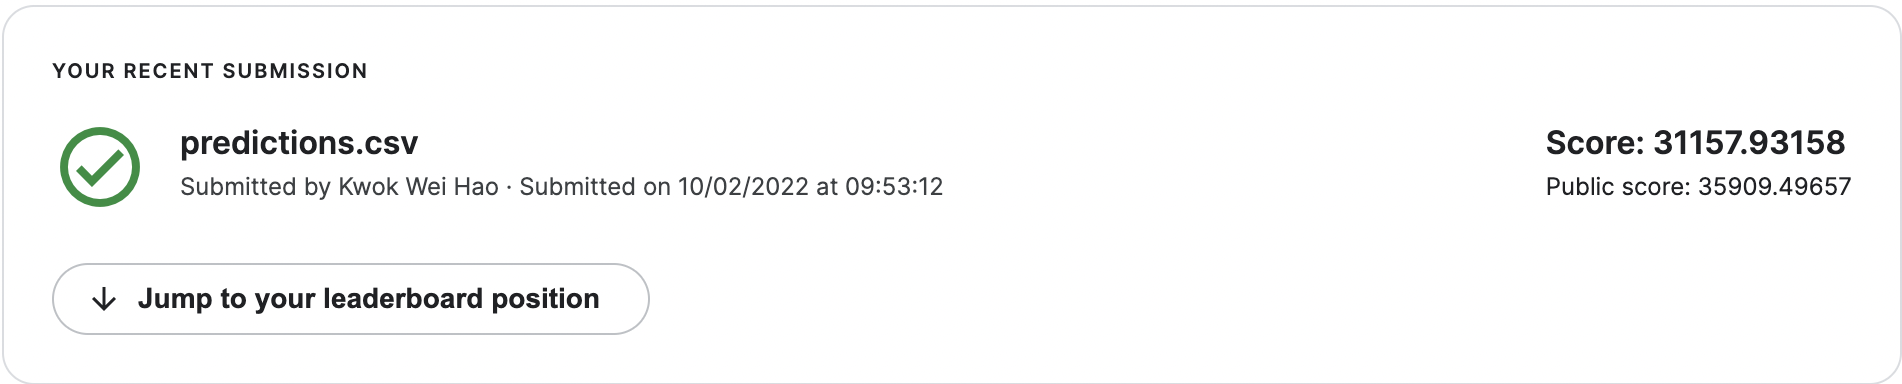

Using the linear regression model that we have created, we submitted it on Kaggle to predict the sale price of the housing for the test data set. The screenshot above shows the results which is determined by the root mean squared error (RMSE). With a RMSE score of 31158, it signifies that our prediction may vary by 31158 from the actual sale pricem which is a metric for determining the error rate of our model.